# Explore here

In [2]:
# Your code here

# NOTES
# DATA_NAME['column_name'].value_counts() to get a count of each distinct value in a column from a data set
# DATA_NAME.describe() - gives the count/mean/std/min/max of each integer column 
# DATA_Name.duplicated() - returns all rows which are duplicated
# DATA_Name.duplicated().sum() - returns the sum of all rows which are duplicated
# DATA_NAME.drop("column_name", axis = 1).duplicated().sum() - remove duplicate columns
# dropped_duplicates_data = DATA_NAME.drop_duplicates(subset='column_name') - to drop duplicates based on a single column
# new_data_without_unncessary_columns = DATA_NAME.drop(["column1", "column2", "columnA", "columnB"])
# Check for duplicates in 'col1' duplicates_col1 = df.duplicated(subset=['col1'], keep=False)
# pd.factorize take whats in a columna and turn it into a number

# datset url https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
test_survived_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
# total_data["neigbourhood"] = test_survived_data["neighbourhood"]

###

# total_data = pd.concat([train_data, test_data]).reset_index(inplace = False)
total_data = train_data
# total_data.drop(columns = ["index"], inplace = True)
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:

# Obtain dimensions of dataframe
# (# rows, # coluns)
total_data.shape

(48895, 16)

In [6]:
total_data.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
total_data.iloc[0]

id                                                              2539
name                              Clean & quiet apt home by the park
host_id                                                         2787
host_name                                                       John
neighbourhood_group                                         Brooklyn
neighbourhood                                             Kensington
latitude                                                    40.64749
longitude                                                  -73.97237
room_type                                               Private room
price                                                            149
minimum_nights                                                     1
number_of_reviews                                                  9
last_review                                               2018-10-19
reviews_per_month                                               0.21
calculated_host_listings_count    

In [8]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
total_data.isnull().sum(axis=0)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are a total of 48895 rows and 16 rows. 

The data has 10 numerical (int65 or float64) characteristics and 6 categorical (object) characteristics.

The variable "host_name" and "name" have a small amount (16 and 21) of null (empty) values. The variable "last_review" and "reviews_per_month" have a large amount (10,052) of null (empty) values.

In [10]:

total_data['neighbourhood'].value_counts(normalize=True)

neighbourhood
Williamsburg          0.080172
Bedford-Stuyvesant    0.075959
Harlem                0.054361
Bushwick              0.050414
Upper West Side       0.040311
                        ...   
Fort Wadsworth        0.000020
Richmondtown          0.000020
New Dorp              0.000020
Rossville             0.000020
Willowbrook           0.000020
Name: proportion, Length: 221, dtype: float64

In [11]:
total_data['room_type'].value_counts(normalize=True)

room_type
Entire home/apt    0.519665
Private room       0.456611
Shared room        0.023724
Name: proportion, dtype: float64

In [12]:
total_data['minimum_nights'].value_counts(normalize=True)

minimum_nights
1      0.260149
2      0.239206
3      0.163595
30     0.076899
4      0.067553
         ...   
186    0.000020
366    0.000020
68     0.000020
87     0.000020
36     0.000020
Name: proportion, Length: 109, dtype: float64

In [13]:
total_data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [14]:

total_data.duplicated()#.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

In [15]:

total_data.duplicated().sum()

0

In [16]:
total_data.drop("host_id", axis = 1)#.duplicated().sum()

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [17]:

total_data['host_name'].duplicated().sum() 

#just checking, not really relevant

37442

In [18]:

total_data['room_type'].nunique()

3

In [19]:

total_data['neighbourhood_group'].nunique()

5

In [20]:
total_data['neighbourhood'].nunique()

221

In [21]:
total_data['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [22]:
total_data['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [23]:
total_data = total_data.drop(["id","host_name", "name", "longitude", "latitude", "host_id", "last_review"], axis=1, errors='ignore')
# total_data = total_data.drop(["id","longitude", "latitude"], axis=1)
# total_data = total_data.drop(["id","host_name" "name", "longitude", "latitude"], axis=1)
#total_data = total_data.drop(["host_id"], axis=1)
total_data

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,2,9
48891,Brooklyn,Bushwick,Private room,40,4,0,NaN,2,36
48892,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,1,27
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,6,2


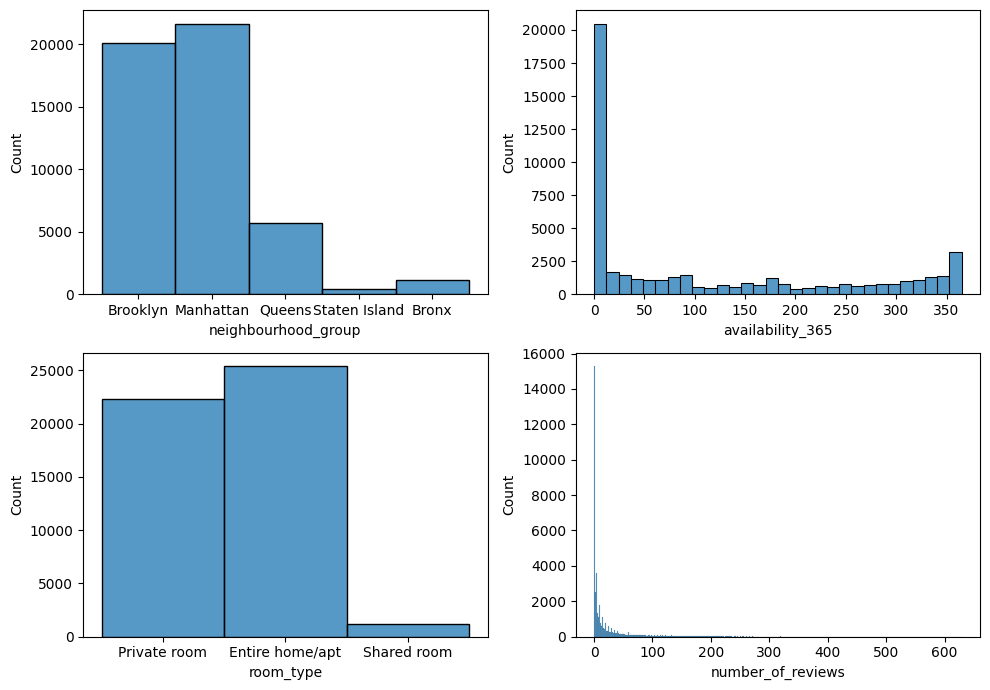

In [24]:
categorical_features = ['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'availability_365', 'neighbourhood']

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = total_data, x = "neighbourhood_group")
sns.histplot(ax = axis[1, 0], data = total_data, x = "room_type")
sns.histplot(ax = axis[0, 1], data = total_data, x = "availability_365")
sns.histplot(ax = axis[1, 1], data = total_data, x = "number_of_reviews")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

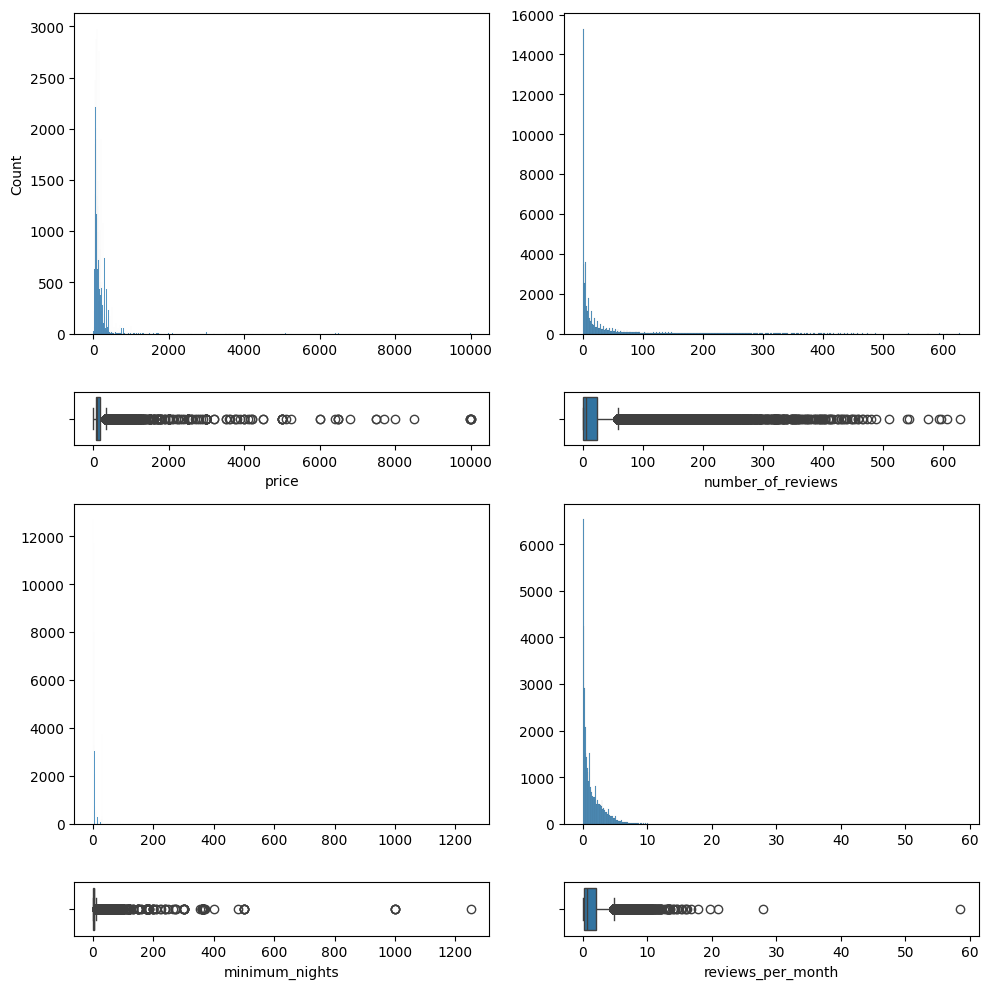

In [25]:
numerical_features = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']

fig, axis = plt.subplots(4, 2, figsize = (10, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = total_data, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")
sns.histplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "number_of_reviews")

sns.histplot(ax = axis[2, 0], data = total_data, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "minimum_nights")
sns.histplot(ax = axis[2, 1], data = total_data, x = "reviews_per_month").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "reviews_per_month")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
#Curious about the price outlier max and its location. Brought up questions about is the price per night or per month or per minimum_stay amount

max_price_index = total_data['price'].idxmax()
row_with_max_price = total_data.loc[max_price_index]
print(row_with_max_price)

neighbourhood_group                     Queens
neighbourhood                          Astoria
room_type                         Private room
price                                    10000
minimum_nights                             100
number_of_reviews                            2
reviews_per_month                         0.04
calculated_host_listings_count               1
availability_365                             0
Name: 9151, dtype: object


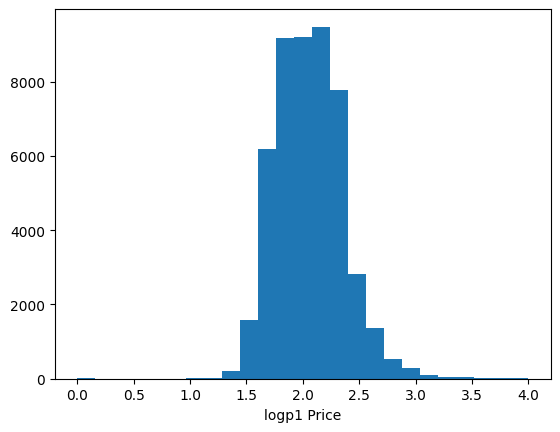

In [27]:
import numpy as np

plt.hist(np.log10(total_data['price']+1), bins=25)
plt.xlabel('logp1 Price')
plt.show()

Step 4: Analysis of Multivariate Variables
After analyzing features one at a time, we can analyze them in relation to each other (muli-).

We'll also split this up into

1.) Numerical-Numerical Analysis, and

2.) Categorical-Categorical Analysis

3.) Numerical-Categorial Analysis

Numerical-Numerical Analysis

We'll start with comparing a numerical feature to another numerical feature.

We'll use scatterplots and correlation analysis to do this.

Since we are interested in predicting the survival of each passenger, we'll compare each numerical

In [28]:
numerical_features

['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']

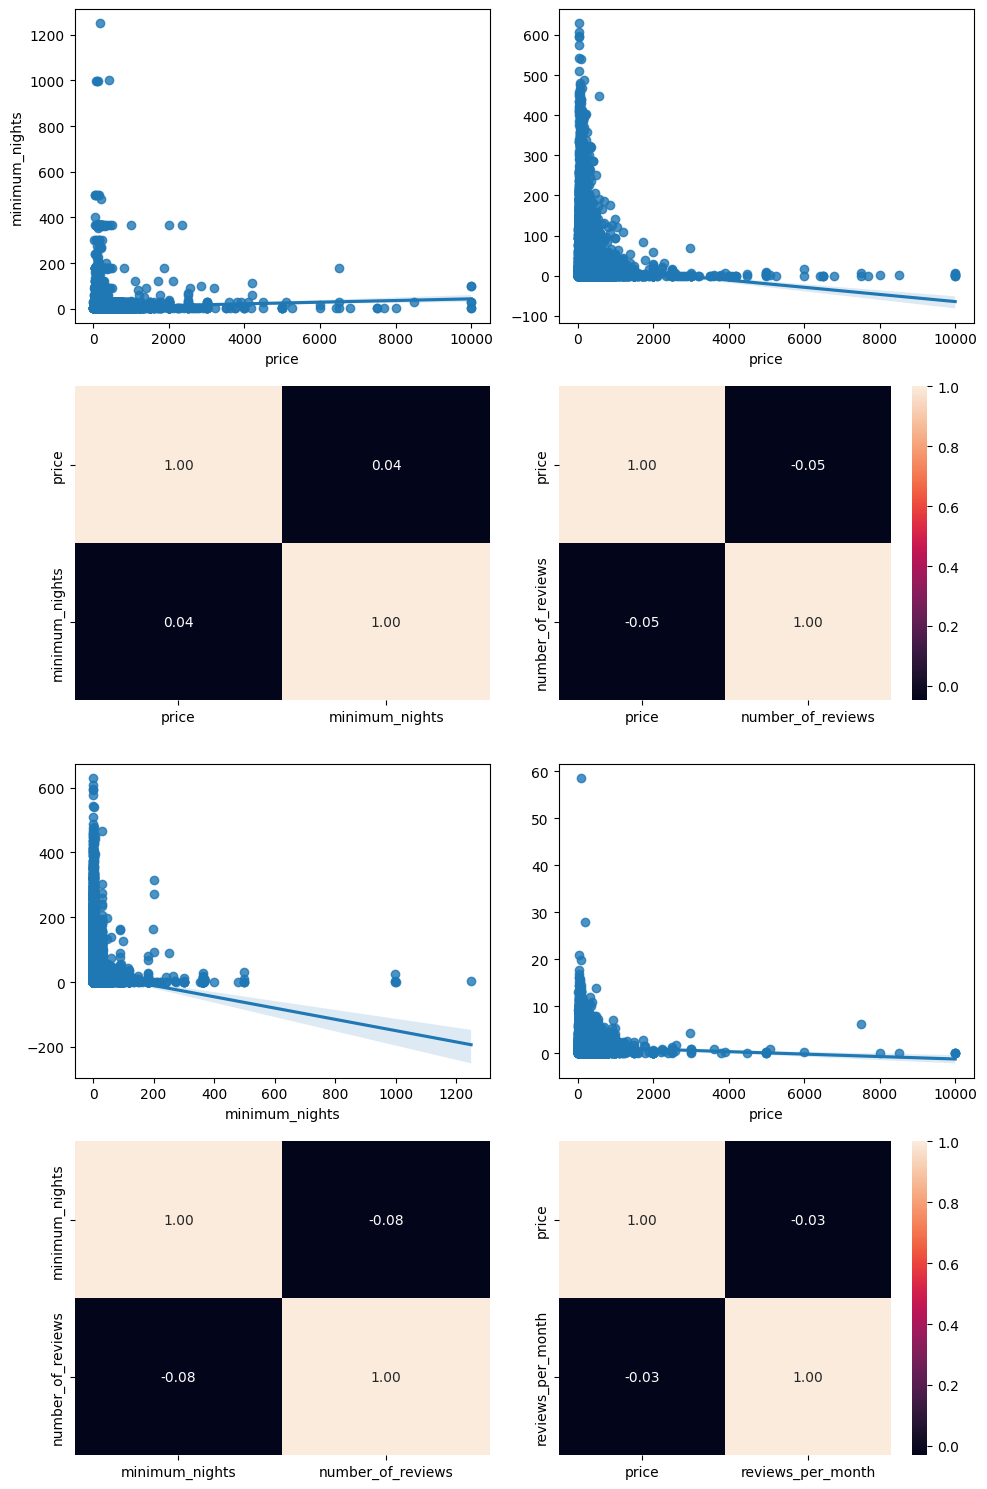

In [31]:
fig, axis = plt.subplots(4, 2, figsize = (10, 15))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "price", y = "minimum_nights")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "price", y = "number_of_reviews").set(ylabel=None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "minimum_nights", y = "number_of_reviews").set(ylabel=None)
sns.heatmap(total_data[["minimum_nights", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar=False)

sns.regplot(ax = axis[2, 1], data = total_data, x = "price", y = "reviews_per_month").set(ylabel=None)
sns.heatmap(total_data[["price", "reviews_per_month"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])



# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

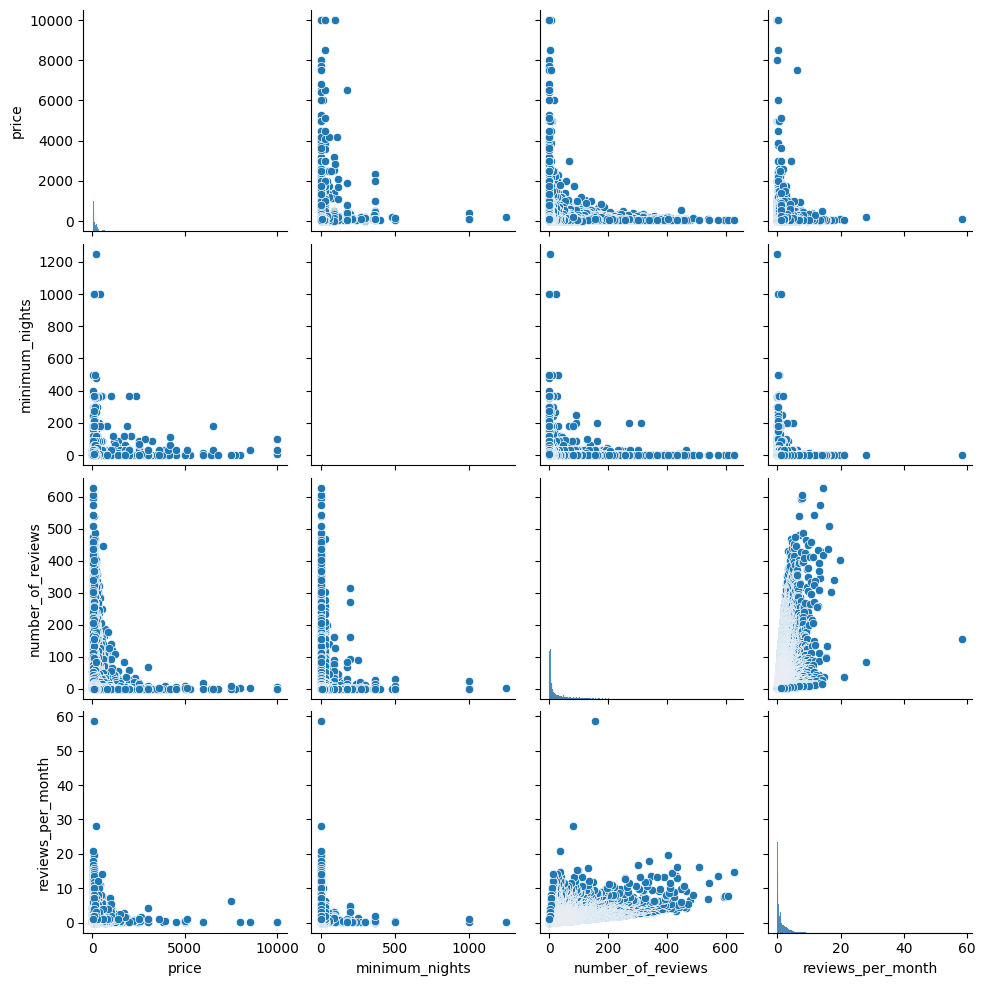

In [32]:
# Warning! Pairplots can be slow!
sns.pairplot(data = total_data[numerical_features + ['neighbourhood_group']])

<Axes: >

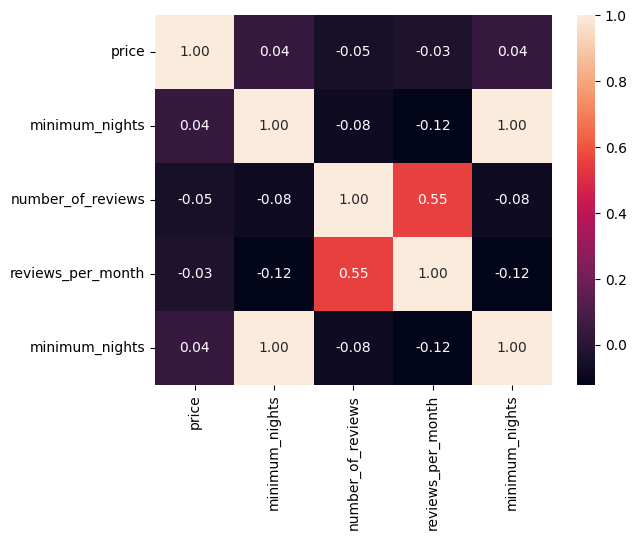

In [34]:
sns.heatmap(total_data[numerical_features + ['minimum_nights']].corr(), annot = True, fmt = ".2f")

In [35]:
categorical_features

['neighbourhood_group',
 'room_type',
 'minimum_nights',
 'number_of_reviews',
 'availability_365',
 'neighbourhood']

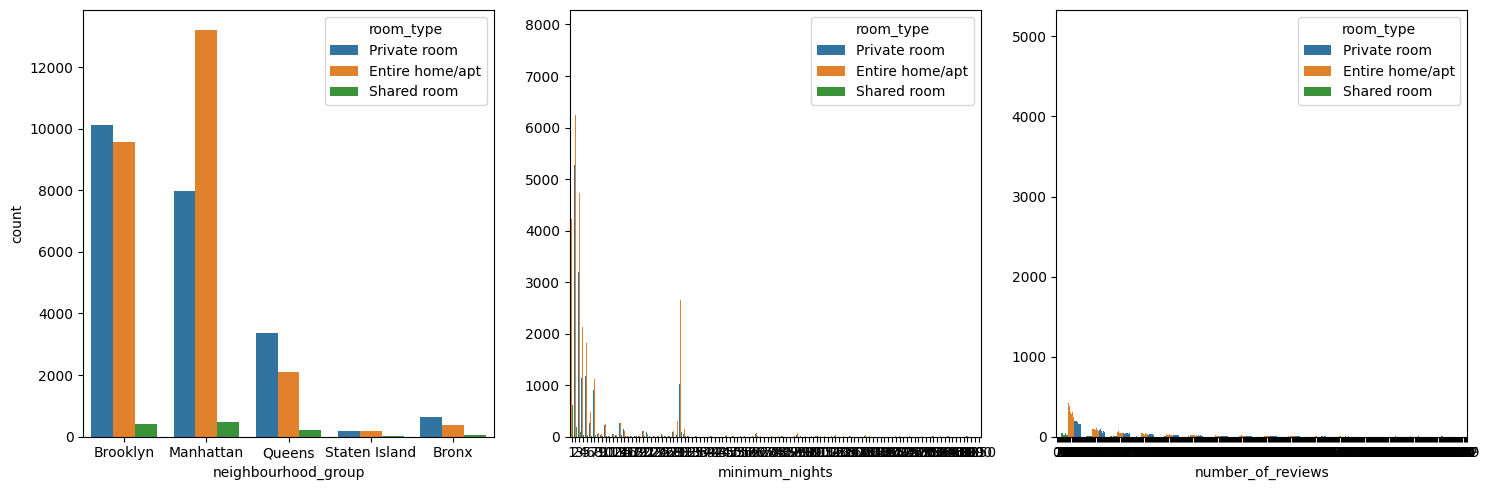

In [36]:
fig, axis = plt.subplots(1,3, figsize = (15, 5))

sns.countplot(ax = axis[0], data = total_data, x = "neighbourhood_group", hue = "room_type")
sns.countplot(ax = axis[1], data = total_data, x = "minimum_nights", hue = "room_type").set(ylabel = None)
sns.countplot(ax = axis[2], data = total_data, x = "number_of_reviews", hue = "room_type").set(ylabel = None)

plt.tight_layout()

plt.show()

<Axes: xlabel='neighbourhood_group', ylabel='minimum_nights'>

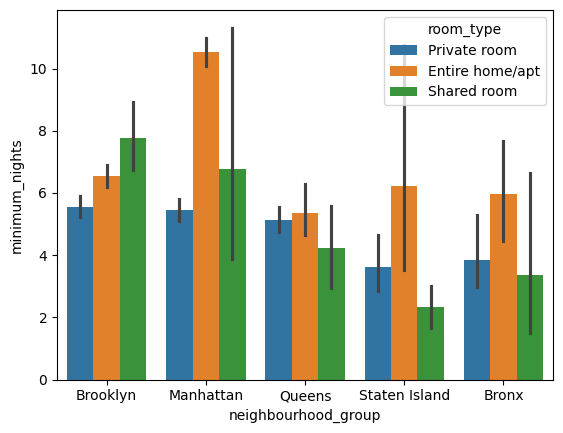

In [39]:

sns.barplot(data = total_data, x = "neighbourhood_group", y = "minimum_nights", hue = "room_type")

In [40]:

total_data["room_type_n"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group_n"] = pd.factorize(total_data["neighbourhood_group"])[0]

In [41]:

total_data[['room_type', 'room_type_n']]

,room_type,room_type_n
0,Private room,0
1,Entire home/apt,1
2,Private room,0
3,Entire home/apt,1
4,Entire home/apt,1
...,...,...
48890,Private room,0
48891,Private room,0
48892,Entire home/apt,1
48893,Shared room,2


In [42]:

total_data[['neighbourhood_group', 'neighbourhood_group_n']]

,neighbourhood_group,neighbourhood_group_n
0,Brooklyn,0
1,Manhattan,1
2,Manhattan,1
3,Brooklyn,0
4,Manhattan,1
...,...,...
48890,Brooklyn,0
48891,Brooklyn,0
48892,Manhattan,1
48893,Manhattan,1


In [47]:

categorical_features = ['neighbourhood_group_n', 'room_type_n', 'minimum_nights', 'number_of_reviews', 'availability_365']
categorical_features

['neighbourhood_group_n',
 'room_type_n',
 'minimum_nights',
 'number_of_reviews',
 'availability_365']

<Axes: >

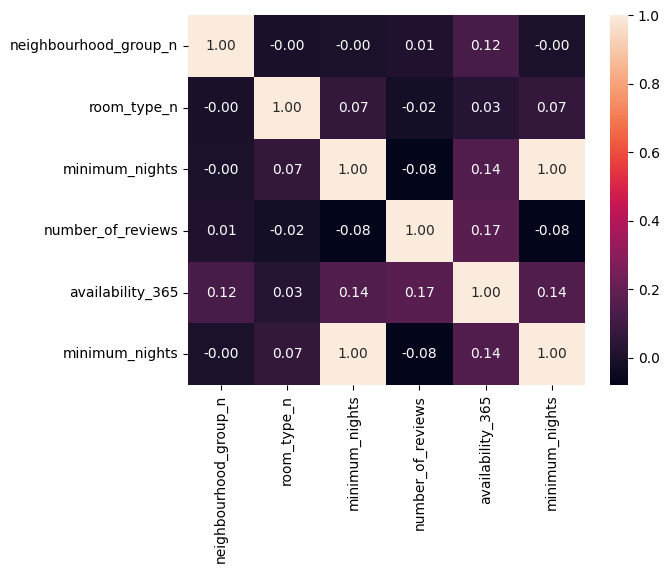

In [48]:

sns.heatmap(total_data[categorical_features + ['minimum_nights']].corr(), annot = True, fmt = ".2f")